In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import geopandas as gpd

In [2]:
density_nonres_wdays_loc = '../Data/Density_New/non_resid_wdays/part-00000-52b02d31-8414-403b-9046-b30b97f3331c-c000.csv'
density_nonres_wends_loc = '../Data/Density_New/non_resid_wends/part-00000-ff507703-ce2e-4fca-b01a-b3ea857ef641-c000.csv'
density_res_wdays_loc = '../Data/Density_New/residents_wdays/part-00000-f17d6fb1-d8d8-4300-ba89-19c5b82d318a-c000.csv'
density_res_wends_loc = '../Data/Density_New/residents_wends/part-00000-d053559a-a78e-4efc-9a3f-dcf48719ad12-c000.csv'
density_nonres_wdays_pd = pd.read_csv(density_nonres_wdays_loc, index_col=False)
density_nonres_wends_pd = pd.read_csv(density_nonres_wends_loc, index_col=False)
density_res_wdays_pd = pd.read_csv(density_res_wdays_loc, index_col=False)
density_res_wends_pd = pd.read_csv(density_res_wends_loc, index_col=False)

In [3]:
density_res_wdays_pd.head()
density_nonres_wdays_pd = density_nonres_wdays_pd[density_nonres_wdays_pd['gen'] == '4G']
density_nonres_wends_pd = density_nonres_wends_pd[density_nonres_wends_pd['gen'] == '4G']
density_res_wdays_pd = density_res_wdays_pd[density_res_wdays_pd['gen'] == '4G']
density_res_wends_pd = density_res_wends_pd[density_res_wends_pd['gen'] == '4G']

density_merged = pd.merge(density_res_wdays_pd, density_nonres_wdays_pd, how='inner', left_on='lkey', right_on='lkey', suffixes=('_r', '_nr'))
density_merged.head()

,lkey,gen_r,LSOA_IMD_decile_r,avg_sum_time_r,avg_count_device_id_r,gen_nr,LSOA_IMD_decile_nr,avg_sum_time_nr,avg_count_device_id_nr
0,130-508250,4G,4,1.796525e+07,394.950,4G,4,1.166061e+07,2986.900
1,130-500207,4G,3,6.512130e+06,191.200,4G,3,1.111892e+07,3102.600
2,110-100038,4G,3,1.230674e+07,266.325,4G,3,9.726390e+06,1657.750
3,110-504551,4G,9,6.221852e+06,159.050,4G,9,1.154766e+07,2895.100
4,120-108009,4G,5,2.776356e+05,7.525,4G,5,6.487222e+06,1104.225


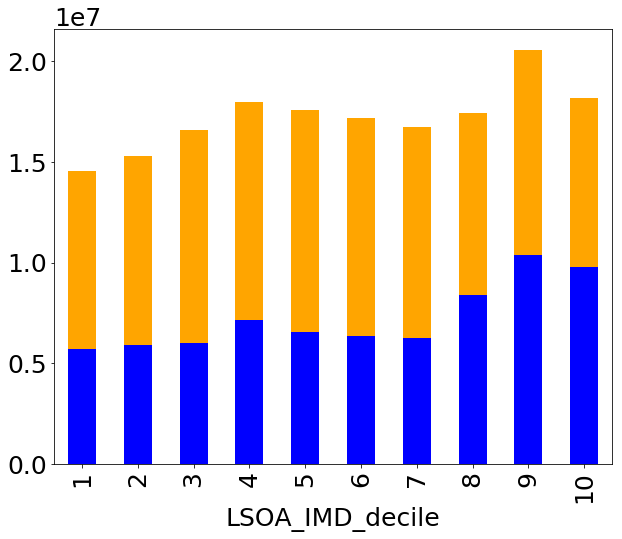

In [38]:
font = {'weight' : 'medium',
       'size'   : 25}
mpl.rc('font', **font)

fig, ax = plt.subplots(figsize=(10,8))
#fig, ax= plt.subplots(1, 1, figsize=(10, 8))
#fig.suptitle('Figure 4: (b) Cumulated time load of an average sector', size=20)

#density_res_mean_per_lsoa = density_res_wdays_pd.groupby('LSOA_IMD_decile')['avg_count_device_id'].mean()
#density_nonres_mean_per_lsoa = density_nonres_wdays_pd.groupby('LSOA_IMD_decile')['avg_count_device_id'].mean()
density_res_mean_per_lsoa = density_res_wdays_pd.groupby('LSOA_IMD_decile')['avg_sum_time'].mean()
density_nonres_mean_per_lsoa = density_nonres_wdays_pd.groupby('LSOA_IMD_decile')['avg_sum_time'].mean()

density_res_mean_per_lsoa.plot(kind='bar', stacked=True,ax=ax,color='blue')
density_nonres_mean_per_lsoa.plot(kind='bar', stacked=True,bottom=density_res_mean_per_lsoa.values,ax=ax,color='orange')


In [4]:
density_nonres_wdays_pd_4G_median=density_nonres_wdays_pd[density_nonres_wdays_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_count_device_id': 'Non-Residents'})['Non-Residents']
density_nonres_wends_pd_4G_median=density_nonres_wends_pd[density_nonres_wends_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_count_device_id': 'Non-Residents'})['Non-Residents']
density_res_wdays_pd_4G_median=density_res_wdays_pd[density_res_wdays_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_count_device_id': 'Residents'})['Residents']
density_res_wends_pd_4G_median=density_res_wends_pd[density_res_wends_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_count_device_id': 'Residents'})['Residents']
norm_factor=1000000
density_nonres_wdays_pd_4G_median_norm=density_nonres_wdays_pd_4G_median/norm_factor
density_nonres_wends_pd_4G_median_norm=density_nonres_wends_pd_4G_median/norm_factor
density_res_wdays_pd_4G_median_norm=density_res_wdays_pd_4G_median/norm_factor
density_res_wends_pd_4G_median_norm=density_res_wends_pd_4G_median/norm_factor

density_nonres_wdays_pd_4G_median_time=density_nonres_wdays_pd[density_nonres_wdays_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_sum_time': 'Non-Residents'})['Non-Residents']
density_nonres_wends_pd_4G_median_time=density_nonres_wends_pd[density_nonres_wends_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_sum_time': 'Non-Residents'})['Non-Residents']
density_res_wdays_pd_4G_median_time=density_res_wdays_pd[density_res_wdays_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_sum_time': 'Residents'})['Residents']
density_res_wends_pd_4G_median_time=density_res_wends_pd[density_res_wends_pd["gen"]=="4G"].groupby("LSOA_IMD_decile").median().rename(columns={'avg_sum_time': 'Residents'})['Residents']
norm_factor=3600*1000
density_nonres_wdays_pd_4G_median_time_norm=density_nonres_wdays_pd_4G_median_time/norm_factor
density_nonres_wends_pd_4G_median_time_norm=density_nonres_wends_pd_4G_median_time/norm_factor
density_res_wdays_pd_4G_median_time_norm=density_res_wdays_pd_4G_median_time/norm_factor
density_res_wends_pd_4G_median_time_norm=density_res_wends_pd_4G_median_time/norm_factor


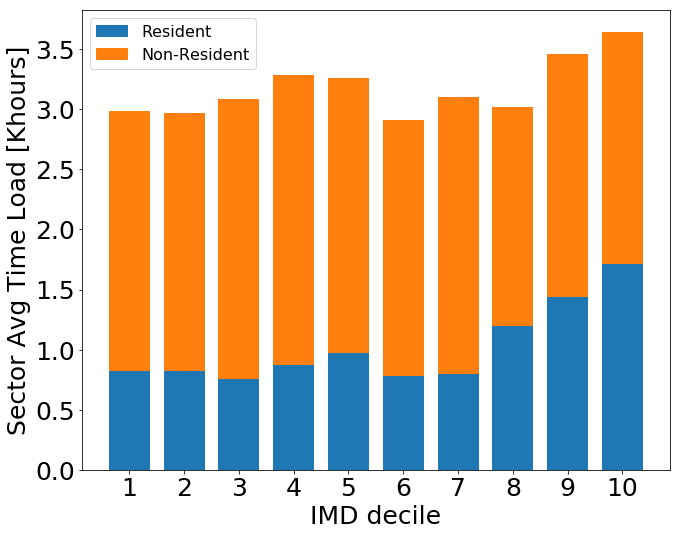

In [8]:
font = {'weight' : 'medium',
        'size'   : 25}
mpl.rc('font', **font)

#fig=plt.figure()
#ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(10,8))

N = 10
#ind=np.arange(1,30,3)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence

#p1=ax.bar(ind, Density_Residents_Wends_4G_median_time, width)
#p2 = ax.bar(ind, Density_Nonresidents_Wends_4G_median_time, width,
#             bottom=Density_Residents_Wends_4G_median_time)

#ax2 = ax.twinx()
ind = np.arange(1,11,1)
p3 = ax.bar(ind, density_res_wdays_pd_4G_median_time_norm, width)
p4 = ax.bar(ind, density_nonres_wdays_pd_4G_median_time_norm, width,
             bottom=density_res_wdays_pd_4G_median_time_norm)


plt.ylabel('Sector Avg Time Load [Khours]')
#ax2.set_ylabel('Device count [#]')
plt.xlabel('IMD decile')
#plt.title('Scores by group and gender')
plt.xticks(np.arange(1,11,1), ('1','2','3','4','5','6','7','8','9','10'))
#plt.ylim(0,2800)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p3[0], p4[0]), ('Resident', 'Non-Resident'),fontsize=16)

plt.tight_layout()
#savefig('time-density-breakdown.pdf')
plt.show()

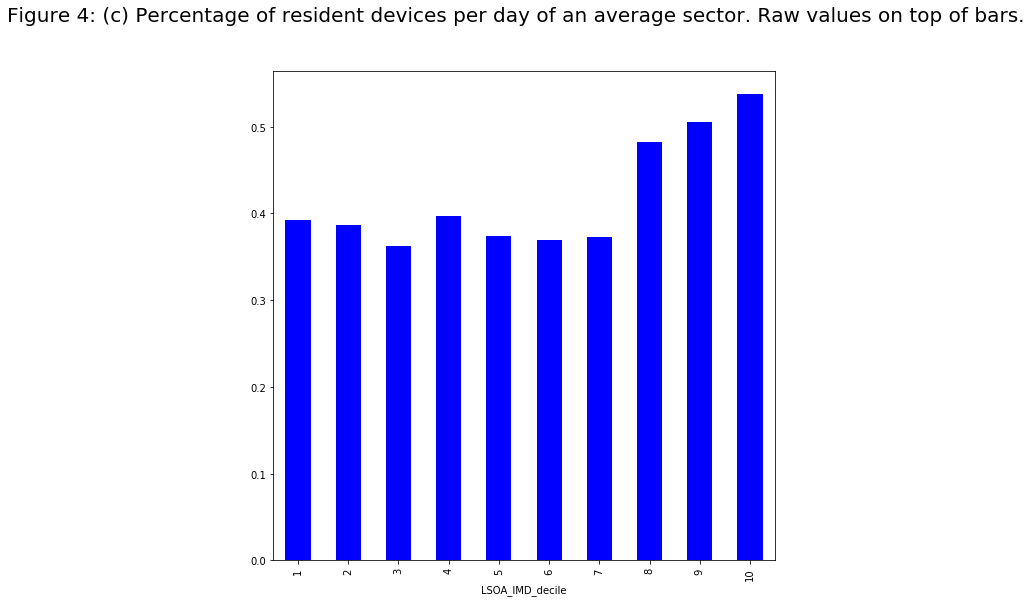

In [26]:
fig, ax= plt.subplots(1, 1, figsize=(9, 9))
fig.suptitle('Figure 4: (c) Percentage of resident devices per day of an average sector. Raw values on top of bars.', size=20)

#density_res_mean_per_lsoa = density_res_wdays_pd.groupby('LSOA_IMD_decile')['avg_count_device_id'].mean()
#density_nonres_mean_per_lsoa = density_nonres_wdays_pd.groupby('LSOA_IMD_decile')['avg_count_device_id'].mean()
density_res_mean_per_lsoa = density_res_wdays_pd.groupby('LSOA_IMD_decile')['avg_sum_time'].mean()
density_nonres_mean_per_lsoa = density_nonres_wdays_pd.groupby('LSOA_IMD_decile')['avg_sum_time'].mean()

(density_res_mean_per_lsoa/(density_res_mean_per_lsoa+density_nonres_mean_per_lsoa)).plot.bar(ax=ax, color='blue')

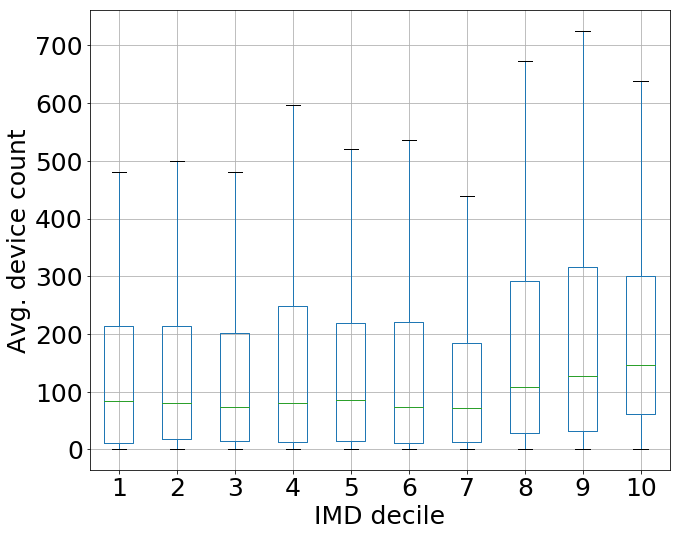

In [37]:
#fig, ax = plt.subplots()

font = {'weight' : 'medium',
       'size'   : 25}
mpl.rc('font', **font)

fig, ax = plt.subplots(figsize=(10,8))

ax = density_res_wdays_pd.boxplot(column='avg_count_device_id', by='LSOA_IMD_decile', showfliers=False, ax=ax)

#ax.set_ylim([0, 1.05])
plt.suptitle("")
plt.title("")
ax.set_xlabel('IMD decile')
ax.set_ylabel('Avg. device count')
#plt.ylabel('')
plt.tight_layout()
plt.show()

In [27]:
density_merged = pd.merge(density_res_wdays_pd, density_nonres_wdays_pd, how='inner', left_on='lkey', right_on='lkey', suffixes=('_r', '_nr'))
density_merged.head()

,lkey,gen_r,LSOA_IMD_decile_r,avg_sum_time_r,avg_count_device_id_r,gen_nr,LSOA_IMD_decile_nr,avg_sum_time_nr,avg_count_device_id_nr
0,130-508250,4G,4,1.796525e+07,394.950,4G,4,1.166061e+07,2986.900
1,130-500207,4G,3,6.512130e+06,191.200,4G,3,1.111892e+07,3102.600
2,110-100038,4G,3,1.230674e+07,266.325,4G,3,9.726390e+06,1657.750
3,110-504551,4G,9,6.221852e+06,159.050,4G,9,1.154766e+07,2895.100
4,120-108009,4G,5,2.776356e+05,7.525,4G,5,6.487222e+06,1104.225


In [28]:
density_merged['avg_sum_time_ratio_r'] = density_merged['avg_sum_time_r'] / (density_merged['avg_sum_time_r'] + density_merged['avg_sum_time_nr']) 

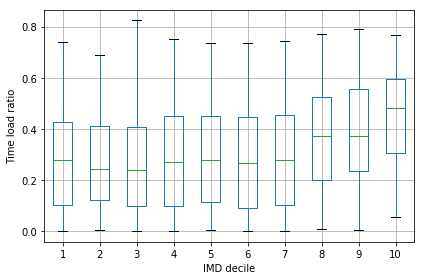

In [30]:
fig, ax = plt.subplots()

ax = density_merged.boxplot(column='avg_sum_time_ratio_r', by='LSOA_IMD_decile_r', showfliers=False, ax=ax)

#ax.set_ylim([0, 1.05])
plt.suptitle("")
plt.title("")
ax.set_xlabel('IMD decile')
ax.set_ylabel('Time load ratio')
#plt.ylabel('')
plt.tight_layout()
plt.show()